# Increasing Sleep Duration using Special Sleep Juice

In [2]:
# dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go

# set plotly to offline mode
plotly.offline.init_notebook_mode(connected=True)

%matplotlib inline

### Import our Dataset

This dataset is from the iOS App "Sleep Cycle".

As a drug company, we'd like to see if our experimental sleep juice will help people improve their quality of sleep, and duration of sleep

In [3]:
df = pd.read_csv("sleepdata.csv", delimiter=";")

### Exploring the Dataset

We want to identify the average sleep quality and duration as a reason for doing our research

In [4]:
df.head()

,Start,End,Sleep quality,Time in bed,Wake up,Sleep Notes,Heart rate,Activity (steps)
0,2014-12-29 22:57:49,2014-12-30 07:30:13,100%,8:32,:),NaN,59.0,0
1,2014-12-30 21:17:50,2014-12-30 21:33:54,3%,0:16,:|,Stressful day,72.0,0
2,2014-12-30 22:42:49,2014-12-31 07:13:31,98%,8:30,:|,NaN,57.0,0
3,2014-12-31 22:31:01,2015-01-01 06:03:01,65%,7:32,NaN,NaN,NaN,0
4,2015-01-01 22:12:10,2015-01-02 04:56:35,72%,6:44,:),Drank coffee:Drank tea,68.0,0


Convert string percentages to float for graphs and other computations

In [5]:
df["Sleep quality"] = df["Sleep quality"].apply(lambda datapoint: float(datapoint.strip("%")) / 100)

In [6]:
df.describe()

,Sleep quality,Heart rate,Activity (steps)
count,887.000000,162.000000,887.000000
mean,0.748952,60.604938,2776.378805
std,0.154333,7.102933,3486.482157
min,0.000000,49.000000,0.000000
25%,0.690000,57.000000,0.000000
50%,0.770000,60.000000,255.000000
75%,0.840000,64.000000,5317.000000
max,1.000000,98.000000,21870.000000


In [7]:
df.shape

(887, 8)

Seems like we have 8 columns, and 887 rows to work with. Let's plot some information on sleep quality and time in bed

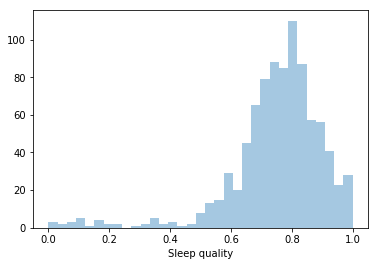

In [8]:
sns.distplot(df["Sleep quality"], kde=False)

In [12]:
def convert_time_to_float(time):
    time_components = time.split(":")
    hour_component = time_components[0]
    minute_component = time_components[1]
    
    percent_of_hour = int(minute_component) / 60
    
    new_time = int(hour_component) + (percent_of_hour)
    
    return float(new_time)

df["Hours in bed"] = df["Time in bed"].apply(lambda time: convert_time_to_float(time))

In [13]:
df.head()

,Start,End,Sleep quality,Time in bed,Wake up,Sleep Notes,Heart rate,Activity (steps),Hours in bed
0,2014-12-29 22:57:49,2014-12-30 07:30:13,1.00,8:32,:),NaN,59.0,0,8.533333
1,2014-12-30 21:17:50,2014-12-30 21:33:54,0.03,0:16,:|,Stressful day,72.0,0,0.266667
2,2014-12-30 22:42:49,2014-12-31 07:13:31,0.98,8:30,:|,NaN,57.0,0,8.500000
3,2014-12-31 22:31:01,2015-01-01 06:03:01,0.65,7:32,NaN,NaN,NaN,0,7.533333
4,2015-01-01 22:12:10,2015-01-02 04:56:35,0.72,6:44,:),Drank coffee:Drank tea,68.0,0,6.733333


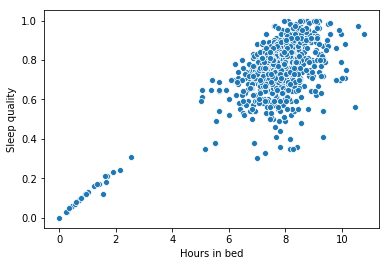

In [15]:
sns.scatterplot(x="Hours in bed", y="Sleep quality", data=df)

## Proposed Research

A scientist at our drug company sees this sleep quality data and creates a juice that he claims should help people sleep longer, and hopefully better. I decide to design the experiment and try to perform it.

### Reason for Performing Test

We want to verify that our scientist's drug actually performs well on tested subjects. This will give us some insight into whether this drug is worth mass producing, and bringing to market. We want a significant increase in  
